# Deep neural netwook playground
This notebook wants to test keras deep NN cofiguration against some standard datasets. To get the feel how layers, activation fuctions and other parameters influence the construction of the solution space and classification results. This notebook is inspired by this tensorflow [Deep neural network playground](https://playground.tensorflow.org) website.

In [1]:
from sklearn.datasets.samples_generator import make_blobs, make_moons, make_circles
from matplotlib import pyplot
from pandas import DataFrame

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

In [2]:
pyplot.rcParams['figure.figsize'] = [20, 10]
pyplot.rcParams["font.size"] = 18

### Dataset generation

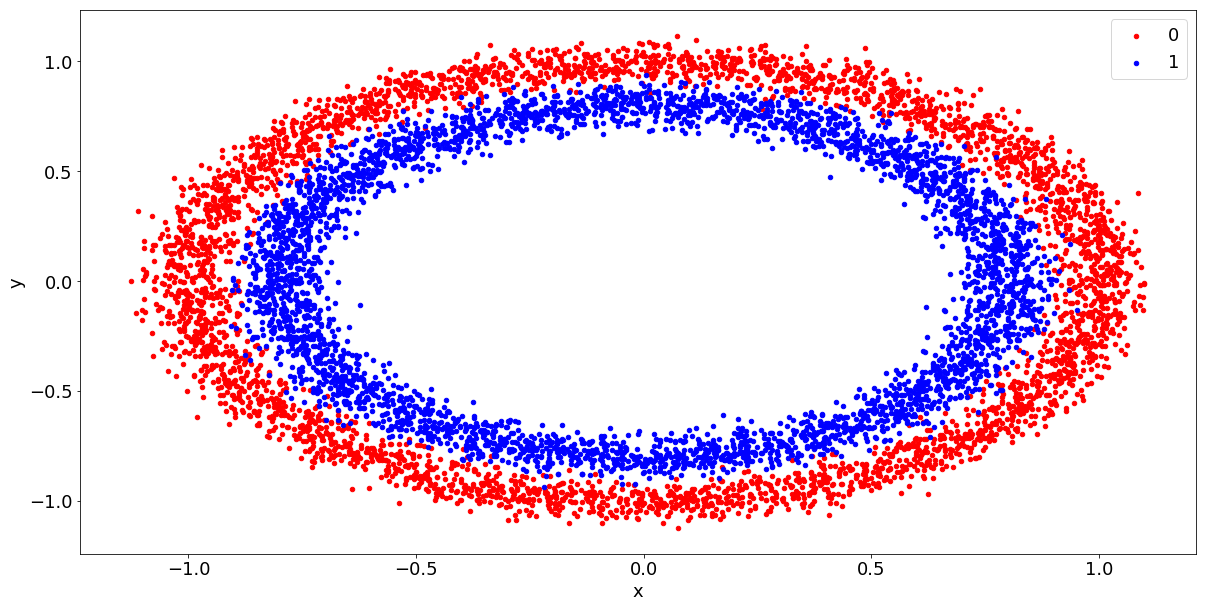

In [106]:
X, y = make_circles(n_samples=8000, noise=0.05, shuffle=True)

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

### Dataset visual exploration

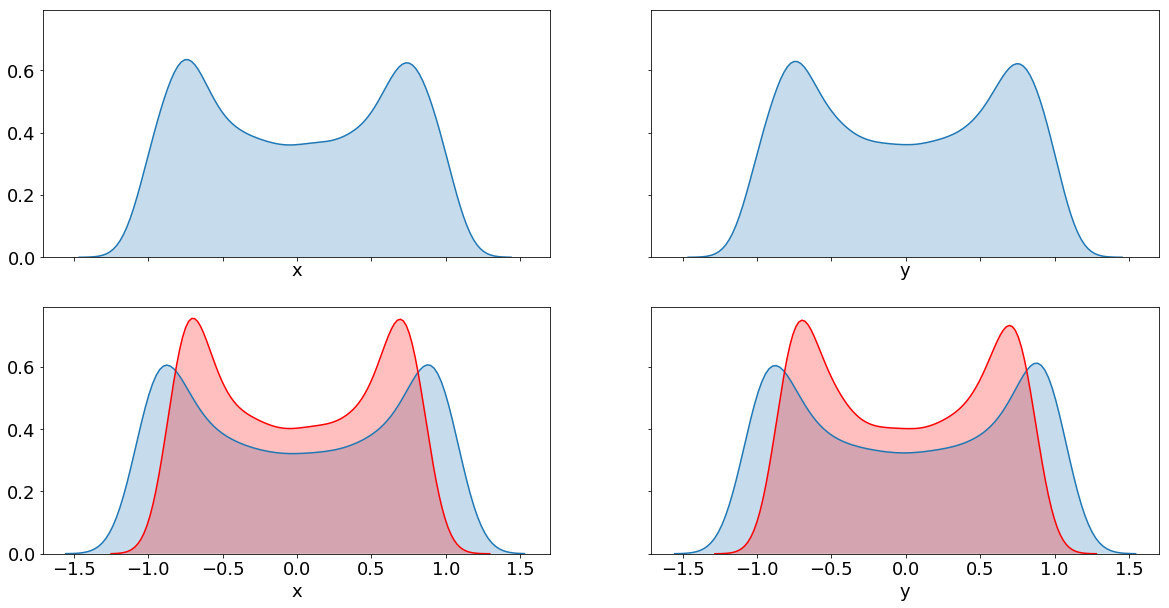

In [107]:
# This is similar to what function sns.pairplot(df, hue='label') can do, but I want less stuff here

fig, axs = pyplot.subplots(nrows=2, ncols=2, sharex=True, sharey=True)

for index, col in enumerate(df.columns[:-1]):
    # Plot a filled kernel density estimate
    sns.distplot(df[col], hist=False, kde_kws={"shade": True}, ax=axs[0, index])
    
    # Plot distributions separated by class
    sns.distplot(df.loc[df.label == 0, col], hist=False, kde_kws={"shade": True}, ax=axs[1, index])
    sns.distplot(df.loc[df.label == 1, col], hist=False, color='r', kde_kws={"shade": True}, ax=axs[1, index])


pyplot.show()

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

### Classification task: Let's see first what a random forest classifier can do

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          title='Confusion matrix',
                          cmap=pyplot.cm.Blues):

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]

    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    print('Confusion matrix, without normalization')
    print(cm)
    
    print("Normalized confusion matrix")
    print(cm_normalized)

    fig, ax = pyplot.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    pyplot.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
            
            ax.text(j, i+0.1, '{} %'.format(round(cm_normalized[i, j] * 100, 2)),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
            
    fig.tight_layout()
    return ax


In [111]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [112]:
y_pred = clf.predict(X_test)

Confusion matrix, without normalization
[[1071  522]
 [  68 1539]]
Normalized confusion matrix
[[0.67 0.33]
 [0.04 0.96]]


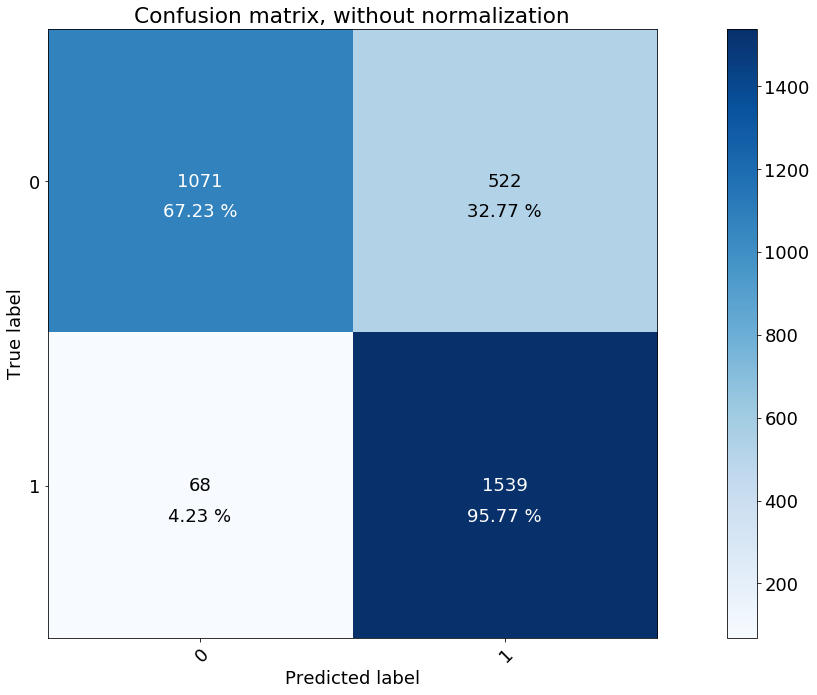

In [113]:
target_names=[0, 1]
    
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=target_names,
                      title='Confusion matrix, without normalization')

pyplot.show()

In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.67      0.78      1593
           1       0.75      0.96      0.84      1607

   micro avg       0.82      0.82      0.82      3200
   macro avg       0.84      0.82      0.81      3200
weighted avg       0.84      0.82      0.81      3200



In [115]:
score = accuracy_score(y_test, y_pred)
score

0.815625

In [116]:
# h is the step size in the mesh
def plot_decision_boundaries(clf, X_train, y_train, X_test, y_test, h = .02):
    
    x_min, x_max = np.min([X_train[:, 0].min(), X_test[:, 0].min()]) - .5, np.max([X_train[:, 0].max(), X_test[:, 0].max()]) + .5
    y_min, y_max = np.min([X_train[:, 1].min(), X_test[:, 1].min()]) - .5, np.max([X_train[:, 1].max(), X_test[:, 1].max()]) + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = pyplot.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    fig, ax = pyplot.subplots()


    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')

    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title('Decision boundaries')

    pyplot.show()

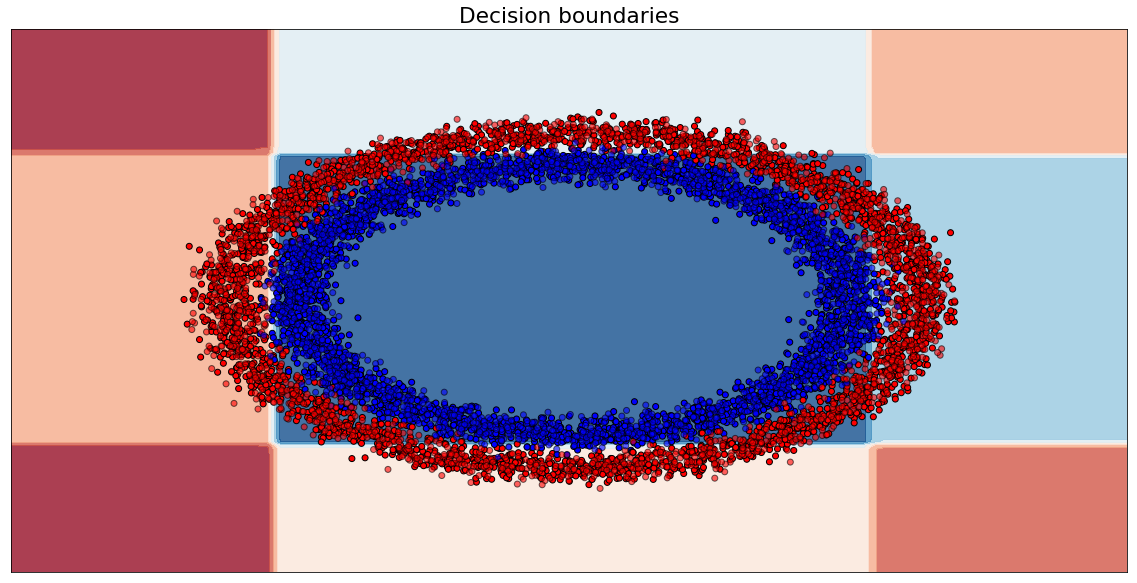

In [117]:
plot_decision_boundaries(clf, X_train, y_train, X_test, y_test)

## Let's now try deep NNs

In [118]:
from keras import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier

Create a basic Keras NNs. The topology can be summarised as:

2 inputs -> [4 hidden nodes] -> [4 hidden nodes]  -> 2 outputs

In [119]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential() 
    model.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=2)) #First Hidden Layer
    model.add(Dense(4, activation='relu', kernel_initializer='random_normal')) #Second  Hidden Layer
    model.add(Dense(2, activation='sigmoid', kernel_initializer='random_normal')) #Output Layer
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [120]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=800, batch_size=15, verbose=0)

In [121]:
y_train_dummy = np_utils.to_categorical(y_train)

#Fitting the data to the training dataset
estimator.fit(X_train, y_train_dummy)

In [122]:
y_pred = estimator.predict(X_test)

Confusion matrix, without normalization
[[1552   41]
 [  88 1519]]
Normalized confusion matrix
[[0.97 0.03]
 [0.05 0.95]]


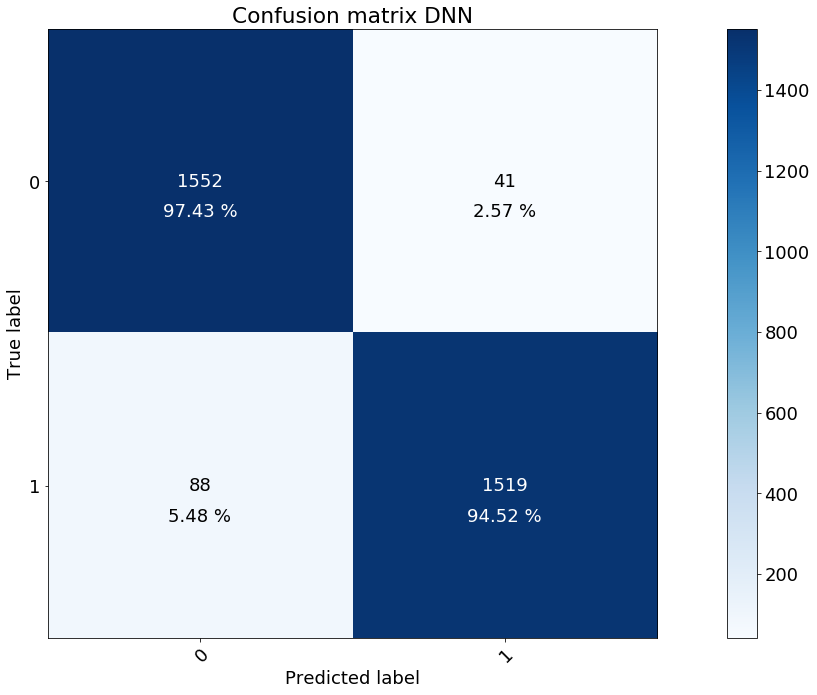

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1593
           1       0.97      0.95      0.96      1607

   micro avg       0.96      0.96      0.96      3200
   macro avg       0.96      0.96      0.96      3200
weighted avg       0.96      0.96      0.96      3200

Accuracy score: 0.96


In [123]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=target_names,
                      title='Confusion matrix DNN')

pyplot.show()

print(classification_report(y_test, y_pred))
print('Accuracy score: %.2f' % accuracy_score(y_test, y_pred))

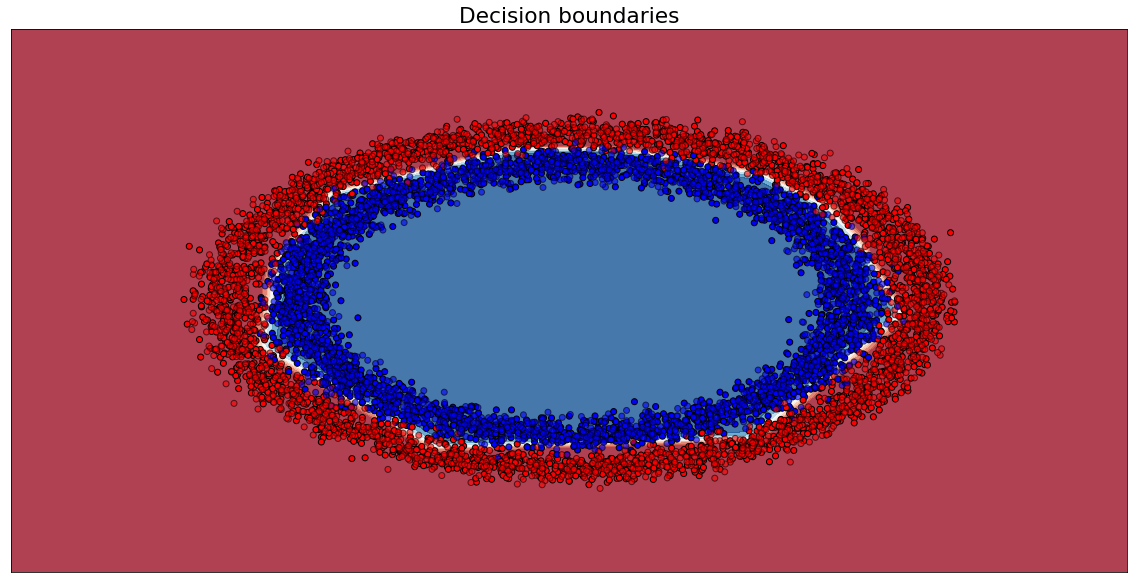

In [124]:
plot_decision_boundaries(estimator, X_train, y_train, X_test, y_test)